In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
creds = ["uktuserdaroglu","Vacy4201(Pri","172.20.20.4","hgo",3306]
#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
265


In [16]:
referral = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)
referral
referral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_DOENTE            10150 non-null  object
 1   PROCESSO             10150 non-null  object
 2   COD_REFERENCIA       10150 non-null  object
 3   COD_PZ               10150 non-null  object
 4   COD_UNID_SAUDE_PROV  10150 non-null  int64 
 5   UNID_PROV            10150 non-null  object
 6   TIPO_UNID            10150 non-null  object
 7   PROVENIENCIA         10150 non-null  object
 8   COD_CTH_PRIOR        10150 non-null  object
 9   CTH_PRIOR            10150 non-null  object
 10  COD_MOTIVO_RECUSA    10150 non-null  int64 
 11  DES_MOTIVO_RECUSA    10150 non-null  object
 12  COD_ESPECIALIDADE    10150 non-null  int64 
 13  DES_ESPECIALIDADE    10150 non-null  object
 14  agrupadora           10150 non-null  object
 15  OUTRA_ENTIDADE       10150 non-null  int64 
 16  DATA

In [ ]:
refferal

In [24]:


# get the dummies and store it in a variable
dummies = pd.get_dummies(referral.ESTADO)

# Concatenate the dummies to original df
merged = pd.concat([referral, dummies], axis='columns')
 
merged.head()

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto,,Marcada,Realizada
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,11,2014,21/05/2015,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an...",0,0,1
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,,...,4,2012,23/04/2012,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...,0,0,1
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,,...,9,2014,26/09/2014,13/01/2015,1,2015,cefaleias,0,0,1
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,,...,10,2013,25/10/2013,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ...",0,0,1
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,,,,...,2,2013,26/02/2013,26/02/2013,2,2013,Sem relatorio clinico,1,0,0


In [113]:
# I splitted estado to its distinct values 
hosp=merged.groupby("UNID_PROV")["Realizada","Marcada",""].sum().reset_index()

#arranged 
hosp["reject"]=hosp[""]
hosp.drop("", axis='columns',inplace= True)
hosp["count"]=hosp["reject"]+hosp["Marcada"]+hosp["Realizada"]

#created a new variable show the success rating of having approval
hosp["rate"]=((hosp["Marcada"]+hosp["Realizada"])/(hosp["count"])*100).round(decimals = 2)
hosp.sort_values(by=["rate"], ascending= False)
hosp.head()




C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,UNID_PROV,Realizada,Marcada,reject,count,rate
0,,1505.0,38.0,2789.0,4332.0,35.62
1,ABELA,0.0,0.0,1.0,1.0,0.00
2,ALHOS VEDROS,0.0,0.0,2.0,2.0,0.00
3,ALMODOVAR,0.0,0.0,2.0,2.0,0.00
4,ALTER DO CHAO,0.0,0.0,2.0,2.0,0.00


In [114]:

avg_ref_per_hosp= hosp["count"].sum()/hosp["UNID_PROV"].count() 
print("Average number of referrals per hospital is " + str(avg_ref_per_hosp))



Average number of referrals per hospital is 84.58333333333333


In [115]:
hosp=hosp.tail(119)
avg_ref_per_hosp= (hosp["count"].sum()/hosp["UNID_PROV"].count())
print("Average number of referrals per hospital is " + str(avg_ref_per_hosp))

Average number of referrals per hospital is 48.890756302521005


In [130]:
#The average rate of getting approval
hosp[hosp["count"]>45].mean()u

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Realizada    137.7200
Marcada        0.0000
reject        77.0800
count        214.8000
rate          62.3812
dtype: float64

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, '')]

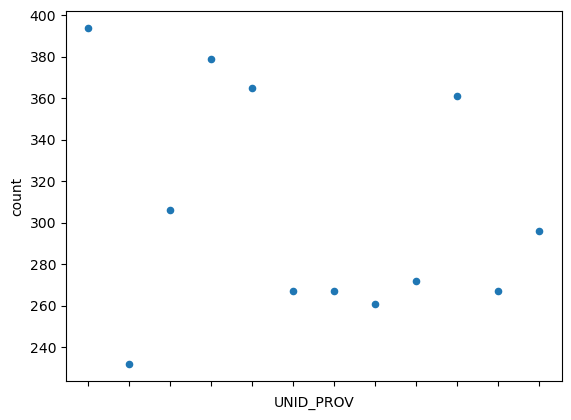

In [127]:

ax=hosp[hosp["count"]>200].plot.scatter(x="UNID_PROV",y="count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


#we have to extract outliers 